<a href="https://colab.research.google.com/github/KubaDavid/VSE-AI/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semestral work Keras and Tensor
This is the last semestral work from VŠE AI 4IZ231\
@authors Kotzias et. al (2015) and Zamazal (2020)\
@editor Jakub David


In [15]:
# Reading data

import pandas as pd

dfAmazon = pd.read_csv('amazon_cells_labelled.csv', names=['sentence', 'label'], sep='\t')

sentences = dfAmazon['sentence'].values

labels = dfAmazon['label'].values
labels = labels.astype(int)


# Checking the data format
print(sentences.shape)
print(labels.shape)
print("{}:{}".format(sentences[10], labels[10]))

(1000,)
(1000,)
And the sound quality is great.:1


In [16]:
# Dividing to train, test and validation datasets

from sklearn.model_selection import train_test_split

sentences_train, sentences_test, labels_train, labels_test = train_test_split(sentences, labels, test_size=0.25, random_state=1000)
sentences_train, sentences_val, labels_train, labels_val = train_test_split(sentences_train, labels_train, test_size=0.2, random_state=1000)

# Data check
print(sentences_train.shape)
print(labels_train.shape)
print("{}:{}".format(sentences_train[9], labels_train[9]))
print(sentences_val.shape)
print(labels_val.shape)
print("{}:{}".format(sentences_val[9], labels_val[9]))
print(sentences_test.shape)
print(labels_test.shape)
print("{}:{}".format(sentences_test[9], labels_test[9]))

(600,)
(600,)
It lasts less than 3o minutes, if I actually try to use the phone.My wife has the same phone with the same problem.:0
(150,)
(150,)
The cable looks so thin and flimsy, it is scary.:0
(250,)
(250,)
Disappointing accessory from a good manufacturer.:0


In [17]:
# Preprocessing into Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
vectorizer.fit(sentences_train)

# Check
print(vectorizer.vocabulary_['and'])
print(vectorizer.vocabulary_['good'])
print(vectorizer.vocabulary_['service'])
print(sentences_train[9])

X_train = vectorizer.transform(sentences_train)
X_val = vectorizer.transform(sentences_val)
X_test = vectorizer.transform(sentences_test)

# Check
print(X_train.shape)
print(X_train[9, :])
print(X_val.shape)
print(X_val[9, :])
print(X_test.shape)
print(X_test[9, :])

y_train = labels_train
y_val = labels_val
y_test = labels_test

65
518
1029
It lasts less than 3o minutes, if I actually try to use the phone.My wife has the same phone with the same problem.
(600, 1352)
  (0, 11)	1
  (0, 35)	1
  (0, 540)	1
  (0, 581)	1
  (0, 624)	1
  (0, 654)	1
  (0, 664)	1
  (0, 743)	1
  (0, 768)	1
  (0, 856)	1
  (0, 900)	1
  (0, 1001)	1
  (0, 1153)	1
  (0, 1156)	1
  (0, 1185)	1
  (0, 1212)	1
  (0, 1244)	1
  (0, 1312)	1
  (0, 1322)	1
(150, 1352)
  (0, 65)	1
  (0, 178)	1
  (0, 466)	1
  (0, 622)	1
  (0, 624)	1
  (0, 687)	1
  (0, 1080)	1
  (0, 1156)	1
(250, 1352)
  (0, 334)	1
  (0, 488)	1
  (0, 518)	1


In [18]:
# Convolution network
import tensorflow as tf

from keras.models import Sequential
from keras import layers

# Number of attributes
input_dim = X_train.shape[1]
print(input_dim)

# Convolution network
convolutionModel = Sequential()
convolutionModel.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
convolutionModel.add(layers.Dense(1, activation='sigmoid'))
convolutionModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
convolutionModel.summary()

# Single layer network
singleModel = Sequential()
singleModel.add(layers.Dense(1, input_dim=input_dim, activation='sigmoid'))
singleModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
singleModel.summary()

1352
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                13530     
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13541 (52.89 KB)
Trainable params: 13541 (52.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 1353      
                                                                 
Total params: 1353 (5.29 KB)
Trainable params: 1353 (5.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________

In [19]:
# Learning

convolutionHistory = convolutionModel.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_val, y_val), verbose=True)

# Evaluation of Convolution on training data
convolutionTrainLoss, convolutionTrainAccuracy = convolutionModel.evaluate(X_train, y_train, verbose=False)
print("Accuracy of convolution model on training data: {:.4f}".format(convolutionTrainAccuracy))

# Evaluation of Convolution on validation data
convolutionValLoss, convolutionValAccuracy = convolutionModel.evaluate(X_val, y_val, verbose=False)
print("Correctness of the convolutional model on validation data: {:.4f}".format(convolutionValAccuracy))
print("Convolutional model loss function on validation data: {:.4f}".format(convolutionValLoss))

# Single layer network trainging
singleHistory = singleModel.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_val, y_val), verbose=True)

# Evaluation of the single-layer model on the training set
singleTrainLoss, singleTrainAccuracy = singleModel.evaluate(X_train, y_train, verbose=False)
print("Correctness of the single-layer model on training data: {:.4f}".format(singleTrainAccuracy))

# Evaluation of a single-layer model on a validation set
singleValLoss, singleValAccuracy = singleModel.evaluate(X_val, y_val, verbose=False)
print("Correctness of the single-layer model on validation data: {:.4f}".format(singleValAccuracy))
print("Loss function of a single-layer model on validation data: {:.4f}".format(singleValLoss))

# Evaluation of the convolutional model on the test set
convolutionTestLoss, convolutionTestAccuracy = convolutionModel.evaluate(X_test, y_test, verbose=False)
print("Correctness of the convolution model on test data: {:.4f}".format(convolutionTestAccuracy))
print("Loss function of the convolution model on test data: {:.4f}".format(convolutionTestLoss))

# Evaluation of the single-layer model on the test set
singleTestLoss, singleTestAccuracy = singleModel.evaluate(X_test, y_test, verbose=False)
print("Správnost jednovrstvého modelu na testovacích datech: {:.4f}".format(singleTrainAccuracy))
print("Ztrátová funkce jednovrstvého modelu na testovacích datech: {:.4f}".format(singleTestLoss))



Epoch 1/10


60/60 [==============================] - 1s 5ms/step - loss: 0.6859 - accuracy: 0.5783 - val_loss: 0.6742 - val_accuracy: 0.7000
Epoch 2/10
60/60 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.8317 - val_loss: 0.6405 - val_accuracy: 0.7867
Epoch 3/10
60/60 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.8817 - val_loss: 0.5903 - val_accuracy: 0.7867
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.9150 - val_loss: 0.5407 - val_accuracy: 0.8067
Epoch 5/10
60/60 [==============================] - 0s 2ms/step - loss: 0.3804 - accuracy: 0.9500 - val_loss: 0.5019 - val_accuracy: 0.8200
Epoch 6/10
60/60 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.9700 - val_loss: 0.4742 - val_accuracy: 0.8133
Epoch 7/10
60/60 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.9833 - val_loss: 0.4505 - val_accuracy: 0.8200
Epoch 8/10
60/60 [=============

# Visualization

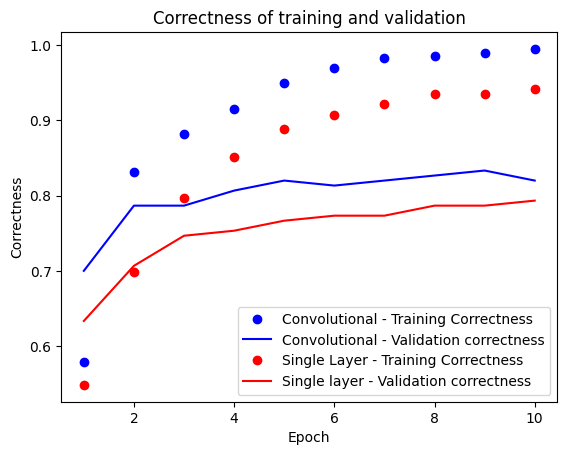

In [20]:
import matplotlib.pyplot as plt

convolutionAccuracyTrain = convolutionHistory.history['accuracy']
convolutionAccuracyVal = convolutionHistory.history['val_accuracy']
convolutionLossTrain = convolutionHistory.history['loss']
convolutionLossVal = convolutionHistory.history['val_loss']

singleAccuracyTrain = singleHistory.history['accuracy']
singleAccuracyVal = singleHistory.history['val_accuracy']
singleLossTrain = singleHistory.history['loss']
singleLossVal = singleHistory.history['val_loss']

epochs = range(1, len(convolutionAccuracyTrain) + 1)

plt.plot(epochs, convolutionAccuracyTrain, 'bo', label='Convolutional - Training Correctness')
plt.plot(epochs, convolutionAccuracyVal, 'b', label='Convolutional - Validation correctness')
plt.plot(epochs, singleAccuracyTrain, 'ro', label='Single Layer - Training Correctness')
plt.plot(epochs, singleAccuracyVal, 'r', label='Single layer - Validation correctness')
plt.title('Correctness of training and validation')
plt.xlabel('Epoch')
plt.ylabel('Correctness')
plt.legend()

plt.savefig('jd_keras_tensor_accuracy.png')

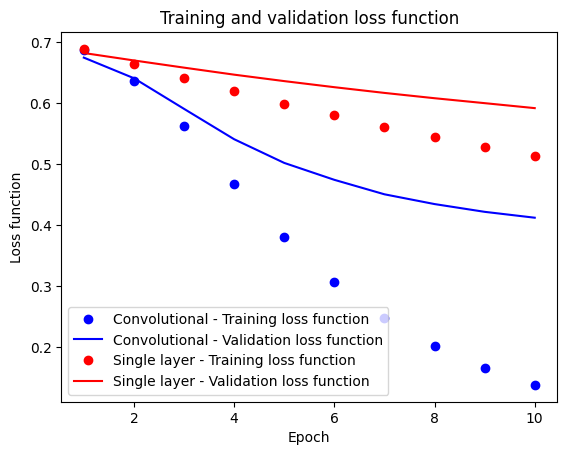

In [21]:
plt.clf()

plt.plot(epochs, convolutionLossTrain, 'bo', label='Convolutional - Training loss function')
plt.plot(epochs, convolutionLossVal, 'b', label='Convolutional - Validation loss function')
plt.plot(epochs, singleLossTrain, 'ro', label='Single layer - Training loss function')
plt.plot(epochs, singleLossVal, 'r', label='Single layer - Validation loss function')
plt.title('Training and validation loss function')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.legend()

plt.savefig('jd_keras_tensor_loss.png')

In [22]:
# Model manipulation

from keras.models import load_model

convolutionModel.save('jd_keras_tensor_convolution.h5')
del convolutionModel
convolutionModel = load_model('jd_keras_tensor_convolution.h5')
convolutionModel.summary()

singleModel.save('jd_keras_tensor_single.h5')
del singleModel
singleModel = load_model('jd_keras_tensor_single.h5')
singleModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                13530     
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13541 (52.89 KB)
Trainable params: 13541 (52.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 1353      
                                                                 
Total params: 1353 (5.29 KB)
Trainable params: 1353 (5.29 KB)
Non-trainable params: 0 (0.00 Byte)
______________________________

c:\Users\jakub\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
